# Born to slide: mobile origin licensing factors confer resistance to conflicts with RNA polymerase

<img style="float: left;" src="https://icons.iconarchive.com/icons/dan-wiersma/solar-system/48/Mars-icon.png">

## Jupyter notebooks 

#### Figures:
+ 4B
+ 4G
+ 4H

#### Archives:
+ Transcription_low-chromatin-licensed-DNA_ATP_1.yama
+ Transcription_low-chromatin-licensed-DNA_ATP_2.yama
+ Transcription_high-chromatin-licensed-DNA_ATP.yama
+ Transcription_licensed-DNA_ATP_LS.yama
+ Transcription_licensed-DNA_ATP_HS.yama
+ Transcription_licensed-DNA_T7T_ATP.yama

#### Additional data:
+ none

### Initialize ImageJ

In [1]:
import imagej
ij = imagej.init('/Applications/Fiji.app')
ij.getVersion()

'2.1.0/1.53c'

### Imports

In [2]:
import sys
sys.path.insert(0, '..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import awesome_data
from marspy.convert.archive import DnaMoleculeArchive, instantiate_archive, describe_archives
from scipy.stats import norm
from tqdm.notebook import tqdm
from functools import reduce

marspy initialized.


### Select archives

In [3]:
selected_archives = ['Transcription_low-chromatin-licensed-DNA_ATP_1.yama',
                     'Transcription_low-chromatin-licensed-DNA_ATP_2.yama',
                     'Transcription_high-chromatin-licensed-DNA_ATP.yama',
                     'Transcription_licensed-DNA_ATP_LS.yama',
                     'Transcription_licensed-DNA_ATP_HS.yama',
                     'Transcription_licensed-DNA_T7T_ATP.yama']

### Figure style and output directory

In [4]:
from figure_style import *

In [5]:
set_style_paper()

In [6]:
dir_out = '/Volumes/pool-duderstadt/Matthias/Manuscript/Figures/SVGs/Figure4/'
dir_out

'/Volumes/pool-duderstadt/Matthias/Manuscript/Figures/SVGs/Figure4/'

### Instantiate selected archives

In [7]:
for archive in tqdm(selected_archives):
    instantiate_archive(archive, awesome_data.datasets)

### Archives Overview

In [8]:
describe_archives(DnaMoleculeArchive.instances)

,# of datasets,# of molecules,labeled proteins,nucleotide,HS challenge?,chromatin,terminator?,archive validation
Transcription_low-chromatin-licensed-DNA_ATP_1,4,85,SNAP-AF488-T7; LD555-H3-NUC; ybbR-LD655-MCM,ATP,False,50x,False,passed
Transcription_low-chromatin-licensed-DNA_ATP_2,4,37,SNAP-AF488-T7; LD555-H3-NUC; ybbR-LD655-MCM,ATP,False,50x,False,passed
Transcription_high-chromatin-licensed-DNA_ATP,4,49,SNAP-AF488-T7; LD555-H3-NUC; ybbR-LD655-MCM,ATP,False,75x,False,passed
Transcription_licensed-DNA_ATP_LS,1,245,ybbR-LD555-T7; ybbR-LD655-MCM,ATP,False,n/a,False,passed
Transcription_licensed-DNA_ATP_HS,1,330,ybbR-LD555-T7; ybbR-LD655-MCM,ATP,True,n/a,False,passed
Transcription_licensed-DNA_T7T_ATP,2,653,SNAP-AF488-T7; SORT-LD555-ORC; ybbR-LD655-MCM,ATP,False,n/a,True,passed


### Load segment tables, apply filter & detect pauses

In [9]:
for index,archive in enumerate(tqdm(DnaMoleculeArchive.instances)):
    
    archive.add_segments_tables()
    archive.filter_segments(b_min=-10, sigma_b_max=10)
    archive.detect_pauses()


### Generate main df

In [10]:
def setup_pandas_df(archive_instances):
    '''
    Sets up a multilevel df with all relevant information
    '''
    
    # indices will be UIDs
    prefixes = set()
    for archive in archive_instances:
        prefixes.update(archive.prefixes)
    col_1 = sorted(list(prefixes))
    #inside
    col_2 = ['initial_intensity', 'lifetime', 'start_site', 'stop_site', 'number_pauses']
    col_3 = ['']
    hier_index = pd.MultiIndex.from_product([col_1,col_2,col_3],names=['molecule','properties','properties_details'])

    return pd.DataFrame(columns=hier_index)
    

In [11]:
df = setup_pandas_df(DnaMoleculeArchive.instances)

# sort MultiIndexCols for performance
df.sort_index(axis=1, inplace=True)
df.head()


Empty DataFrame
Columns: [(MCM_1_, initial_intensity, ), (MCM_1_, lifetime, ), (MCM_1_, number_pauses, ), (MCM_1_, start_site, ), (MCM_1_, stop_site, ), (MCM_2_, initial_intensity, ), (MCM_2_, lifetime, ), (MCM_2_, number_pauses, ), (MCM_2_, start_site, ), (MCM_2_, stop_site, ), (NUC_1_, initial_intensity, ), (NUC_1_, lifetime, ), (NUC_1_, number_pauses, ), (NUC_1_, start_site, ), (NUC_1_, stop_site, ), (NUC_2_, initial_intensity, ), (NUC_2_, lifetime, ), (NUC_2_, number_pauses, ), (NUC_2_, start_site, ), (NUC_2_, stop_site, ), (NUC_3_, initial_intensity, ), (NUC_3_, lifetime, ), (NUC_3_, number_pauses, ), (NUC_3_, start_site, ), (NUC_3_, stop_site, ), (NUC_4_, initial_intensity, ), (NUC_4_, lifetime, ), (NUC_4_, number_pauses, ), (NUC_4_, start_site, ), (NUC_4_, stop_site, ), (NUC_5_, initial_intensity, ), (NUC_5_, lifetime, ), (NUC_5_, number_pauses, ), (NUC_5_, start_site, ), (NUC_5_, stop_site, ), (ORC_1_, initial_intensity, ), (ORC_1_, lifetime, ), (ORC_1_, number_pauses, ), (ORC_1_, start_site, ), (ORC_1_, stop_site, ), (ORC_2_, initial_intensity, ), (ORC_2_, lifetime, ), (ORC_2_, number_pauses, ), (ORC_2_, start_site, ), (ORC_2_, stop_site, ), (T7_1_, initial_intensity, ), (T7_1_, lifetime, ), (T7_1_, number_pauses, ), (T7_1_, start_site, ), (T7_1_, stop_site, )]
Index: []

[0 rows x 50 columns]

In [12]:
# fill dataframe
for archive in tqdm(DnaMoleculeArchive.instances):

    for molecule in archive.molecules:
        #print('handling molecule '+molecule.uid)
        # general columns first
        df.loc[molecule.uid,'dna_length'] = molecule.calc_length_dna()
        df.loc[molecule.uid,'dna_count_valid'] = archive.dna_count_valid
        df.loc[molecule.uid,'hs_wash'] = archive.highsalt_wash
        df.loc[molecule.uid,'nucleotide'] = archive.nucleotide
        df.loc[molecule.uid,'t7_terminator'] = archive.t7_terminator
        df.loc[molecule.uid,'chromatin'] = archive.chromatin
        df.loc[molecule.uid,'tags'] = reduce(lambda tag1,tag2: tag1+','+tag2, molecule.tags)

        # general proteins
        for protein in molecule.proteins:
            #store protein number
            df.loc[molecule.uid,'number_'+protein] = molecule.params['Number_'+protein]
            #assign label for each protein
            df.loc[molecule.uid,'label_'+protein] = archive.labels[protein]
            
            # burst velocity (weighted average, exclude pauses, all regions)
            # always calculate weighted average for all seg_dfs of a protein
            # check if protein has a SegmentsTable, otherwise skip
            if len(list(filter(lambda seg_df: protein in seg_df.prefix, molecule.seg_dfs))) > 0:
                df.loc[molecule.uid,('velocity_'+protein)] = \
                np.average([seg_df.calc_rate()[0] for seg_df in list(filter(lambda seg_df: protein in seg_df.prefix, molecule.seg_dfs))],
                           weights=[seg_df.calc_rate()[1] for seg_df in list(filter(lambda seg_df: protein in seg_df.prefix, molecule.seg_dfs))])
        
        # every specific protein
        for prefix in molecule.prefixes:

            #take mean intensity from first 10 frames (maybe need try block later if shorter traces)
            df.loc[molecule.uid,(prefix,'initial_intensity')] = molecule.df.iloc[:10][prefix+'Intensity'].mean()

            #lifetime (in frames) defined on tracking length
            df.loc[molecule.uid,(prefix,'lifetime')] = len(molecule.df[prefix+'y'].dropna())
            
            #start & stop site
            if re.match('T7',prefix):
                df.loc[molecule.uid,(prefix,'start_site')] = molecule.df[prefix+'Position_on_DNA'].min()
                df.loc[molecule.uid,(prefix,'stop_site')] = molecule.df[prefix+'Position_on_DNA'].max()
            else:
                df.loc[molecule.uid,(prefix,'start_site')] = molecule.df.iloc[:5][prefix+'Position_on_DNA'].mean()
                df.loc[molecule.uid,(prefix,'stop_site')] = molecule.df[prefix+'Position_on_DNA'].max()

            
            #pauses:
            #number of pauses
            #- do not consider first segment (transcription stalling before UTP arrival)
            #- do not consider pauses above 19 kb on DNA (exclude diffraction limit towards end of DNA = 1.5-2kb)
            #- do not consider pauses with less than 20 seconds (x2-x1)
            
            #note: following is split up in multiple lines to avoid long arguments and reusage
            #save as temporal variable (already exclude exclude first segment of each segment table (index 0 stays in concatenated))
            # check if protein prefix has a SegmentsTable, otherwise skip
            if len(list(filter(lambda seg_df: prefix == seg_df.prefix, molecule.seg_dfs))) > 0:
                _seg_df = pd.concat([seg_df.df for seg_df in list(filter(lambda seg_df: prefix == seg_df.prefix, molecule.seg_dfs))]).drop(0,axis=0)
                # reset index for proper loops by index later
                _seg_df.reset_index(drop=True, inplace=True)
                # filter df based on pause definition (keep all segments which are not a pause for recovery)
                _seg_df = _seg_df[(_seg_df['x2'] - _seg_df['x1'] >= 20) & 
                                  (_seg_df['y2'] < 19000) & (_seg_df['y1'] < 19000) | 
                                  (_seg_df['pause_B'] == False)]
                             
            
                df.loc[molecule.uid,(prefix,'number_pauses')] = _seg_df['pause_B'].sum()
            
                #loop through filtered _seg_df to get pause details:
                pause_counter = 0
                for row in _seg_df.index:
                    #do we have a pause segment?
                    if _seg_df.loc[row,'pause_B']:
                        pause_counter+=1

                        # pause duration (endtime - starttime: x2-x1)
                        df.loc[molecule.uid,(prefix,'pause_'+str(pause_counter),'duration')] = \
                        _seg_df.loc[row,'x2'] - _seg_df.loc[row,'x1']

                        # pause position on dna (mean of start and end: y2-y1)
                        df.loc[molecule.uid,(prefix,'pause_'+str(pause_counter),'position_on_dna')] = \
                        (_seg_df.loc[row,'y2'] + _seg_df.loc[row,'y1']) / 2

                        # does it recover from pause (=> is it the last segment)
                        # note: concatenated df is perfect because subsequent region can show pause recovery
                        df.loc[molecule.uid,(prefix,'pause_'+str(pause_counter),'recovery')] = \
                        row != _seg_df.index.max()

                # sanity check between pause_counter and earlier detected pauses
                # [0] necessary because of multi-index. use .xs() alternatively
                if pause_counter != df.loc[molecule.uid,(prefix,'number_pauses')][0]:
                    print(f"Attention! Problem with pause detection in molecule {molecule.uid}.")
                    
# fill all NaN values in number_protein with 0
proteins = set()
for archive in DnaMoleculeArchive.instances:
    proteins.update(archive.proteins)

for protein in proteins:
    df['number_'+protein] = df['number_'+protein].apply(lambda value: 0 if np.isnan(value) else value)
    
# convert tags back to list
df['tags'] = df['tags'].apply(lambda tags: tags.split(','))

# again sort MultiIndexCols for performance
df.sort_index(axis=1, inplace=True)

# fix data types
df = df.infer_objects()


/Users/matze/anaconda3/envs/scijava/lib/python3.7/site-packages/pandas/core/indexing.py:1762: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/Users/matze/anaconda3/envs/scijava/lib/python3.7/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)


In [13]:
df.head()

molecule                          MCM_1_                                  \
properties             initial_intensity lifetime number_pauses  pause_1   
properties_details                                              duration   
b41fLtG3s1CKeRSYxDRPnh          33373.05    149.0           NaN      NaN   
MohVcrg5gSLwRZiBDoELx           34993.30    150.0           NaN      NaN   
4cxCbzRmEV2569HAuUMgP2          46828.95    150.0           NaN      NaN   
itoMYhnhxmthYj9xvBcemt          18193.90     46.0           0.0      NaN   
kGiy949YdQz2GhqMKopzta          39474.80    150.0           0.0      NaN   

molecule                                                                  \
properties                                       pause_2                   
properties_details     position_on_dna recovery duration position_on_dna   
b41fLtG3s1CKeRSYxDRPnh             NaN      NaN      NaN             NaN   
MohVcrg5gSLwRZiBDoELx              NaN      NaN      NaN             NaN   
4cxCbzRmEV2569HAuUMgP2             NaN      NaN      NaN             NaN   
itoMYhnhxmthYj9xvBcemt             NaN      NaN      NaN             NaN   
kGiy949YdQz2GhqMKopzta             NaN      NaN      NaN             NaN   

molecule                                  ... number_MCM number_NUC  \
properties                       pause_3  ...                         
properties_details     recovery duration  ...                         
b41fLtG3s1CKeRSYxDRPnh      NaN      NaN  ...        1.0        1.0   
MohVcrg5gSLwRZiBDoELx       NaN      NaN  ...        1.0        2.0   
4cxCbzRmEV2569HAuUMgP2      NaN      NaN  ...        1.0        1.0   
itoMYhnhxmthYj9xvBcemt      NaN      NaN  ...        1.0        1.0   
kGiy949YdQz2GhqMKopzta      NaN      NaN  ...        1.0        1.0   

molecule               number_ORC number_T7 t7_terminator  \
properties                                                  
properties_details                                          
b41fLtG3s1CKeRSYxDRPnh        0.0       0.0         False   
MohVcrg5gSLwRZiBDoELx         0.0       1.0         False   
4cxCbzRmEV2569HAuUMgP2        0.0       0.0         False   
itoMYhnhxmthYj9xvBcemt        0.0       1.0         False   
kGiy949YdQz2GhqMKopzta        0.0       1.0         False   

molecule                                               tags velocity_MCM  \
properties                                                                 
properties_details                                                         
b41fLtG3s1CKeRSYxDRPnh     [accept, coll_MCM_1_NUC_1_stall]          NaN   
MohVcrg5gSLwRZiBDoELx      [accept, coll_MCM_1_NUC_1_stall]          NaN   
4cxCbzRmEV2569HAuUMgP2     [accept, coll_MCM_1_NUC_1_stall]          NaN   
itoMYhnhxmthYj9xvBcemt      [accept, coll_MCM_1_NUC_1_push]    60.458379   
kGiy949YdQz2GhqMKopzta  [accept, coll_MCM_1_NUC_1_NUCeject]    52.301483   

molecule               velocity_NUC velocity_ORC velocity_T7  
properties                                                    
properties_details                                            
b41fLtG3s1CKeRSYxDRPnh          NaN          NaN         NaN  
MohVcrg5gSLwRZiBDoELx           NaN          NaN         NaN  
4cxCbzRmEV2569HAuUMgP2          NaN          NaN         NaN  
itoMYhnhxmthYj9xvBcemt          NaN          NaN         NaN  
kGiy949YdQz2GhqMKopzta          NaN          NaN         NaN  

[5 rows x 90 columns]

## Figures

### Figure 4B: Chromatin reduces MCM displacement (processivity)
Note: only consider DNA w/o T7T, one MCM foci

In [14]:
df_proc = pd.DataFrame(columns=['initial_intensity','processivity'])

# loop through all archives with chromatin low (50x) and high (75x)


for archive in filter(lambda archive: not archive.t7_terminator,DnaMoleculeArchive.instances):

    # loop through all molecules
    for molecule in filter(lambda molecule: (re.search('coll_MCM_1_' ,' '.join(molecule.tags))) 
                           or (re.search('MCM_1_push' ,' '.join(molecule.tags))), archive.molecules):
        
# apply following molecule filters to only look at pushed MCMs        
# chromatin => coll_MCM_1_ => all pushed MCMs in presence of NUC
# naked => MCM_1_push => all pushed MCMs in absence of NUC
        
        # only with 1 MCM (usually at ARS1)
        if molecule.proteins['MCM'] != 1:
            continue
            
        valid = True
                
        for protein, number in molecule.proteins.items():
            # make sure molecule only contains NUC & T7 
            if (number > 0 and protein not in {'T7', 'NUC', 'MCM'}):
                valid = False
                continue
            # more than 1 T7 (just a sanity check, shouldn't happen)
            elif number > 1 and protein not in {'NUC', 'MCM'}:
                valid = False
                continue
                
        # loop through all seg_dfs with T7 in prefix
        if valid:
            start_mcm = molecule.df.iloc[:5]['MCM_1_Position_on_DNA'].mean()
            stop_mcm = molecule.df['MCM_1_Position_on_DNA'].max()
            intensity = 0
            
            for prefix in molecule.prefixes:
                # all NUCs 
                if re.match('NUC',prefix):
                    # NUC downstream of MCM
                    if molecule.df.iloc[:5][prefix+'Position_on_DNA'].mean() > start_mcm:
                        intensity += molecule.df.iloc[:5][prefix+'Intensity'].mean()

            _temp_df = pd.DataFrame(data=[[intensity,(stop_mcm-start_mcm)/1000]],
                                    columns=['initial_intensity','processivity'])
            df_proc = pd.concat([df_proc,_temp_df])
                

df_proc = df_proc.convert_dtypes()
df_proc = df_proc.dropna()
df_proc

,initial_intensity,processivity
0,31418.2,2.439351
0,30263.8,2.600918
0,39303.0,3.295632
0,48825.1,14.689769
0,29657.1,15.851968
...,...,...
0,0.0,15.376462
0,0.0,15.746206
0,0.0,11.473785
0,0.0,15.614617


In [15]:
df_proc.corr()

,initial_intensity,processivity
initial_intensity,1.000000,-0.384444
processivity,-0.384444,1.000000


In [16]:
# 1 LD555 has around 35000 intensity, but labeling is 150 % only
# intensity cutoffs estimated with bernoulli probabilities
def estimate_bleaching(intensity):
    if intensity == 0:
        return '0'
    elif intensity < 80000:
        return '1'
    elif intensity < 140000:
        return '2'
    else:
        return '>=3'

In [17]:
df_proc['number_NUC'] = df_proc['initial_intensity'].apply(estimate_bleaching)
df_proc

,initial_intensity,processivity,number_NUC
0,31418.2,2.439351,1
0,30263.8,2.600918,1
0,39303.0,3.295632,1
0,48825.1,14.689769,1
0,29657.1,15.851968,1
...,...,...,...
0,0.0,15.376462,0
0,0.0,15.746206,0
0,0.0,11.473785,0
0,0.0,15.614617,0


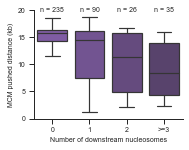

In [18]:
# Actual plot: Number of MCM DH vs observed rates
protein = 'MCM_NUC'
fig,axes = plt.subplots()

sns.boxplot(x='number_NUC',y='processivity',data=df_proc,order=sorted(df_proc['number_NUC'].unique()),
            palette=palettes[protein],fliersize=0)


#calculate number of observations
nobs = df_proc['number_NUC'].value_counts().sort_index()
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n = " + i for i in nobs]

#put nobs into plot

pos = range(len(nobs))

for tick,label in zip(pos,axes.get_xticklabels()):
    axes.text(pos[tick], 20, nobs[tick],
    horizontalalignment='center',verticalalignment='center')

axes.set_ylim(0,20)
axes.set_xlabel('Number of downstream nucleosomes')
axes.set_ylabel('MCM pushed distance (kb)')

# axes.set_title('T7 RNAP can push trains of MCM DHs')

sns.despine()
#plt.tight_layout()

plt.savefig(dir_out+'4B_MCM_displacement_vs_#NUC.svg',transparent=True)

### Figure 4G: Collision outcome pushed MCM DH and Nucleosomes

In [19]:
# correlate collision outcome with NUC intensity
df_coll = pd.DataFrame(columns=['initial_intensity','coll_outcome'])

# loop through all archives with chromatin low (50x) and high (75x)
for archive in filter(lambda archive: archive.chromatin in {'50x','75x'},DnaMoleculeArchive.instances):
    for molecule in archive.molecules:
        # check for potential collision with each nucleosome
        intensity = 0
        for i in range(1,molecule.proteins['NUC']+1):
            collision = False
            for tag in molecule.tags:
                if re.match('coll_MCM_1_NUC_'+str(i)+'_',tag):
                    collision = True
                    outcome = tag.split('coll_MCM_1_NUC_'+str(i)+'_')[-1]
            if collision:
                # NUC intensity
                intensity += molecule.df.iloc[:5]['NUC_'+str(i)+'_Intensity'].mean()

                _temp_df = pd.DataFrame(data=[[intensity,outcome]],columns=['initial_intensity','coll_outcome'])
                df_coll = pd.concat([df_coll,_temp_df])

                # actions depending on different outcomes
                # reset intensity to 0 in case NUC was ejected and not pushed
                # note T7eject & stall won't lead to subsequent collisions

                # MCM ejected or stall => skip other nucleosomes
                if re.search('MCMeject',outcome) or re.search('stall',outcome):
                    break
                # NUC ejected => go back to previous intensity
                elif re.search('NUCeject',outcome):
                    # subtract added intensity for subsequent collisions
                    intensity -= molecule.df.iloc[:5]['NUC_'+str(i)+'_Intensity'].mean()
                else:
                    # push and pause
                    continue
            
        

In [20]:
df_coll

,initial_intensity,coll_outcome
0,31418.2,stall
0,30263.8,stall
0,39303.0,stall
0,48825.1,push
0,29657.1,NUCeject
...,...,...
0,153546.2,stall
0,69763.6,stall
0,70603.6,pause
0,37900.3,stall


In [21]:
df_coll['number_NUC'] = df_coll['initial_intensity'].apply(estimate_bleaching)
df_coll

,initial_intensity,coll_outcome,number_NUC
0,31418.2,stall,1
0,30263.8,stall,1
0,39303.0,stall,1
0,48825.1,push,1
0,29657.1,NUCeject,1
...,...,...,...
0,153546.2,stall,>=3
0,69763.6,stall,1
0,70603.6,pause,1
0,37900.3,stall,1


In [22]:
df_coll.groupby('number_NUC').describe()

initial_intensity                                         \
                       count           mean           std       min   
number_NUC                                                            
1                      120.0   49004.070833  14820.075097   14070.6   
2                       38.0  109858.252632  18610.911433   80778.8   
>=3                     22.0  222497.668182  81885.775175  145938.4   

                                                        
                   25%        50%        75%       max  
number_NUC                                              
1            38405.100   47903.90   60297.60   79873.8  
2            93601.675  106389.75  128582.85  139770.2  
>=3         166707.650  189143.15  255833.15  447887.8

In [23]:
# concatenate nuc counts for both chromatin & valid dna counts
temp_df = pd.concat([pd.DataFrame(data=[df_coll[(df_coll['number_NUC']==number_nuc)]['coll_outcome'].value_counts()
                                        for number_nuc in df_coll['number_NUC'].unique()])],axis=0).T
temp_df.columns = [number_nuc for number_nuc in df_coll['number_NUC'].unique()]
temp_df

,1,2,>=3
push,58,16,8
stall,40,15,11
pause,13,6,1
NUCeject,9,1,2


In [24]:
df_coll = temp_df.copy()
del(temp_df)

In [25]:
#order
df_coll = df_coll.reindex(['push', 'NUCeject','pause', 'stall'])
df_coll

,1,2,>=3
push,58,16,8
NUCeject,9,1,2
pause,13,6,1
stall,40,15,11


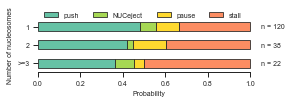

In [26]:
#plot a stacked barplot
fig,axes = plt.subplots(figsize=(4,1))

(df_coll.iloc[:, ::-1]/df_coll.iloc[:, ::-1].sum()).T.plot(kind='barh',stacked=True,ax=axes,rot=0,edgecolor='.15',
                               color=[palettes['qualitative'][0],palettes['qualitative'][4],
                                      palettes['qualitative'][5],palettes['qualitative'][1]])

axes.set_xlabel("Probability")
axes.set_ylabel("Number of nucleosomes")
#axes.set_title("Fate upon T7RNAP-MCM collision")
axes.set_xlim([0,1.05])


labels = [int(df_coll.iloc[:, ::-1].sum()[col]) for col in df_coll.iloc[:, ::-1].columns]

#calculate y offset to label bars on top

rects = axes.patches
counter = 0
for rect, label in zip(rects, labels):
    axes.text(1.05, rect.get_y() + rect.get_height()/2, s=f'n = {label}', ha='left', va='center')
    counter+=1
axes.legend(ncol=len(df.index),bbox_to_anchor=[0, 1.05], loc='center left',frameon=False)

#tidy up
#fig.tight_layout()
sns.despine(trim=True,left=True)

#save
plt.savefig(dir_out+'4G_MCM-NUC_collision_fate.svg',transparent=True)

### Figure 4H: MCM rate vs #NUC

In [27]:
df_push = pd.DataFrame(columns=['initial_intensity','velocity'])

# loop through all archives with chromatin low (50x) and high (75x)
for archive in DnaMoleculeArchive.instances:
#for archive in [archive0,archive1,archive4,archive5]:
    # loop through all molecules
    for molecule in archive.molecules:
        valid = True
        
        # only with 1 MCM (usually at ARS1)
        if molecule.proteins['MCM'] != 1:
            continue
            
        valid = True
                
        for protein, number in molecule.proteins.items():
            # make sure molecule only contains NUC & T7 
            if (number > 0 and protein not in {'T7', 'NUC', 'MCM'}):
                valid = False
                continue
            # more than 1 T7 (just a sanity check, shouldn't happen)
            elif number > 1 and protein not in {'NUC', 'MCM'}:
                valid = False
                continue
                
        # loop through all seg_dfs with MCM in prefix
        if valid:
            for seg_df in filter(lambda seg_df: 'MCM' in seg_df.prefix, molecule.seg_dfs):
                # get the rate
                velocity = seg_df.calc_rate()[0]

                # get intensity_NUC
                intensity = 0
                # add intensities for all pushed NUCs
                for i in range(1,seg_df.pushed_proteins['NUC']+1):
                    intensity += molecule.df.iloc[:5]['NUC_'+str(i)+'_Intensity'].mean()

                _temp_df = pd.DataFrame(data=[[intensity,velocity]],
                                        columns=['initial_intensity','velocity'])
                df_push = pd.concat([df_push,_temp_df])
                
                
df_push = df_push.convert_dtypes()
df_push = df_push.dropna()
df_push

,initial_intensity,velocity
0,0.0,62.416073
0,48825.1,59.932499
0,0.0,52.301483
0,0.0,58.335819
0,70030.3,55.281543
...,...,...
0,0.0,47.333634
0,0.0,46.115498
0,0.0,50.890073
0,0.0,44.706537


In [28]:
df_push.corr()

,initial_intensity,velocity
initial_intensity,1.000000,-0.077204
velocity,-0.077204,1.000000


In [29]:
df_push['number_NUC'] = df_push['initial_intensity'].apply(estimate_bleaching)

In [30]:
df_push.groupby('number_NUC').describe()

initial_intensity                                         \
                       count           mean           std       min   
number_NUC                                                            
0                      486.0       0.000000      0.000000       0.0   
1                       78.0   50018.750000  16593.400363   10899.6   
2                       24.0  104957.341667  18714.773654   81924.6   
>=3                     11.0  243634.609091  95005.539759  146917.2   

                                                       velocity             \
                   25%       50%         75%       max    count       mean   
number_NUC                                                                   
0                0.000       0.0       0.000       0.0    486.0  51.947999   
1            36854.600   48710.5   64641.725   79873.8     78.0  52.765065   
2            88765.225  104676.9  119429.550  139240.4     24.0  50.288149   
>=3         170452.850  220666.7  288068.250  447887.8     11.0  46.437413   

                                                                              
                  std        min        25%        50%        75%        max  
number_NUC                                                                    
0            6.486385  27.027475  48.432204  52.509338  56.577023  68.362355  
1            8.440293  24.327840  48.280301  54.251467  58.101224  67.912103  
2           10.215702  34.178401  40.348616  51.271774  56.180820  74.736611  
>=3         10.143319  24.575566  42.198636  45.647569  52.164645  62.265978

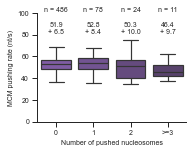

In [31]:
# Number of NUC vs observed rates
protein = 'MCM_NUC'
fig,axes = plt.subplots()

sns.boxplot(x='number_NUC',y='velocity',data=df_push,order=sorted(df_push['number_NUC'].unique()),
            palette=palettes[protein],fliersize=0)


#calculate number of observations
nobs = df_push['number_NUC'].value_counts().sort_index()
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n = " + i for i in nobs]

#put nobs into plot

pos = range(len(nobs))

for tick,label in zip(pos,axes.get_xticklabels()):
    axes.text(pos[tick], 100, nobs[tick],
    horizontalalignment='center',verticalalignment='bottom')
    
rates = []
# fit data to normal distribution and print on plot
for num_nuc in sorted(df_push['number_NUC'].unique()):
    mu, std = norm.fit(df_push[df_push['number_NUC']==num_nuc]['velocity'])
    rates.append(f'{round(mu,1)}\n+ {round(std,1)}')
    
for tick,label in zip(pos,axes.get_xticklabels()):
    axes.text(pos[tick], 80, rates[tick],
    horizontalalignment='center',verticalalignment='bottom')

axes.set_ylim(0,100)
axes.set_xlabel('Number of pushed nucleosomes')
axes.set_ylabel('MCM pushing rate (nt/s)')

# axes.set_title('T7 RNAP can push trains of MCM DHs')

sns.despine()
#plt.tight_layout()

plt.savefig(dir_out+'4H_MCM_rates_vs_#NUC.svg',transparent=True)